In [1]:
library(edgeR)
library (lattice)
library (snpStats)
library (tidyverse)
library(EnhancedVolcano)
library(VennDiagram)
library(gplots)
library(dplyr)

library(fgsea)
library(data.table)
library(ggplot2)
library(Rcpp)

counts = read.delim('counts_matrix_KO_Control_Fulv16.csv', row.names = 1, sep = ',')
head(counts)
names(counts)

Loading required package: limma

Loading required package: survival

Loading required package: Matrix

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
Loading required package: ggrepel

Loading required package: grid

Loading required package: futile.logger


Attaching packag

,Fulv16.12.2.rerun,Fulv.D16.G.1,Fulv.D16.12.3,Fulv.D16.G.2,Fulv.D16.12.1,Fulv.D16.G.3
,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000223972.5,1,2,1,6,3,4
ENSG00000227232.5,136,257,59,253,144,152
ENSG00000278267.1,0,0,0,0,0,0
ENSG00000243485.5,0,0,0,1,0,0
ENSG00000284332.1,0,0,0,0,0,0
ENSG00000237613.2,0,0,0,0,1,1


[1] "Fulv16.12.2.rerun" "Fulv.D16.G.1"      "Fulv.D16.12.3"    
[4] "Fulv.D16.G.2"      "Fulv.D16.12.1"     "Fulv.D16.G.3"

In [2]:
d0 = DGEList(counts)
d0 = calcNormFactors(d0)
head(d0)

cutoff = 1
drop = which(apply(cpm(d0), 1, max) < cutoff)
d = d0[-drop,] 
dim(d) # number of genes left
print(d)



An object of class "DGEList"
$counts
                  Fulv16.12.2.rerun Fulv.D16.G.1 Fulv.D16.12.3 Fulv.D16.G.2
ENSG00000223972.5                 1            2             1            6
ENSG00000227232.5               136          257            59          253
ENSG00000278267.1                 0            0             0            0
ENSG00000243485.5                 0            0             0            1
ENSG00000284332.1                 0            0             0            0
ENSG00000237613.2                 0            0             0            0
                  Fulv.D16.12.1 Fulv.D16.G.3
ENSG00000223972.5             3            4
ENSG00000227232.5           144          152
ENSG00000278267.1             0            0
ENSG00000243485.5             0            0
ENSG00000284332.1             0            0
ENSG00000237613.2             1            1

$samples
                  group lib.size norm.factors
Fulv16.12.2.rerun     1 58600065    0.9937091
Fulv.D16.G.1          1 59090412    0.9910846
Fulv.D16.12.3         1 29948040    1.0310974
Fulv.D16.G.2          1 54609625    0.9903044
Fulv.D16.12.1         1 57445122    1.0157712
Fulv.D16.G.3          1 50184402    0.9789617

[1] 14271     6

An object of class "DGEList"
$counts
                  Fulv16.12.2.rerun Fulv.D16.G.1 Fulv.D16.12.3 Fulv.D16.G.2
ENSG00000227232.5               136          257            59          253
ENSG00000279457.4               195          298           119          334
ENSG00000225972.1               728         1979           383         1392
ENSG00000225630.1              1770         3640           824         2194
ENSG00000237973.1             10530        24420          5969        18546
                  Fulv.D16.12.1 Fulv.D16.G.3
ENSG00000227232.5           144          152
ENSG00000279457.4           188          276
ENSG00000225972.1           851         1693
ENSG00000225630.1          1849         3224
ENSG00000237973.1         11872        21035
14266 more rows ...

$samples
                  group lib.size norm.factors
Fulv16.12.2.rerun     1 58600065    0.9937091
Fulv.D16.G.1          1 59090412    0.9910846
Fulv.D16.12.3         1 29948040    1.0310974
Fulv.D16.G.2          1

In [3]:
#dataframe for gsea non ranked input
norm_counts = as.data.frame(d$counts)

gene_name_df <- read.csv('name_description.csv', sep = ',')
norm_counts$gene_name = gene_name_df$Description[match(row.names(norm_counts), gene_name_df$Name)]
write.csv(norm_counts, 'fulv16_filtered_counts.csv')

In [4]:
sample_description = read.delim('sample_descriptions_KO_Control_Fulv16.csv', sep = ',')
sample_description

Sample,Treatment,Days,Background,KO_Guide,Singleclone,Pooled
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
Fulv16-12-2-rerun,Fulvestrant,16,KO,12,N,N
Fulv-D16-G-1,Fulvestrant,16,Control,G,N,N
Fulv-D16-12-3,Fulvestrant,16,KO,12,N,N
Fulv-D16-G-2,Fulvestrant,16,Control,G,N,N
Fulv-D16-12-1,Fulvestrant,16,KO,12,N,N
Fulv-D16-G-3,Fulvestrant,16,Control,G,N,N


[1] Fulvestrant.KO      Fulvestrant.Control Fulvestrant.KO     
[4] Fulvestrant.Control Fulvestrant.KO      Fulvestrant.Control
Levels: Fulvestrant.Control Fulvestrant.KO
[1] Fulvestrant.16.KO      Fulvestrant.16.Control Fulvestrant.16.KO     
[4] Fulvestrant.16.Control Fulvestrant.16.KO      Fulvestrant.16.Control
Levels: Fulvestrant.16.Control Fulvestrant.16.KO
[1] Fulvestrant.16.12 Fulvestrant.16.G  Fulvestrant.16.12 Fulvestrant.16.G 
[5] Fulvestrant.16.12 Fulvestrant.16.G 
Levels: Fulvestrant.16.12 Fulvestrant.16.G


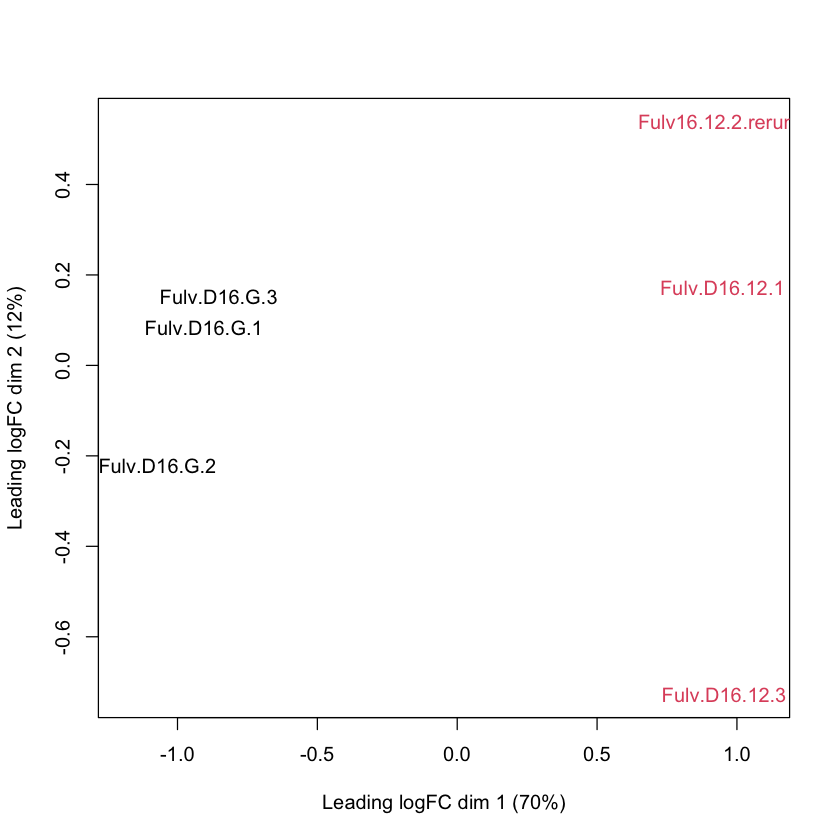

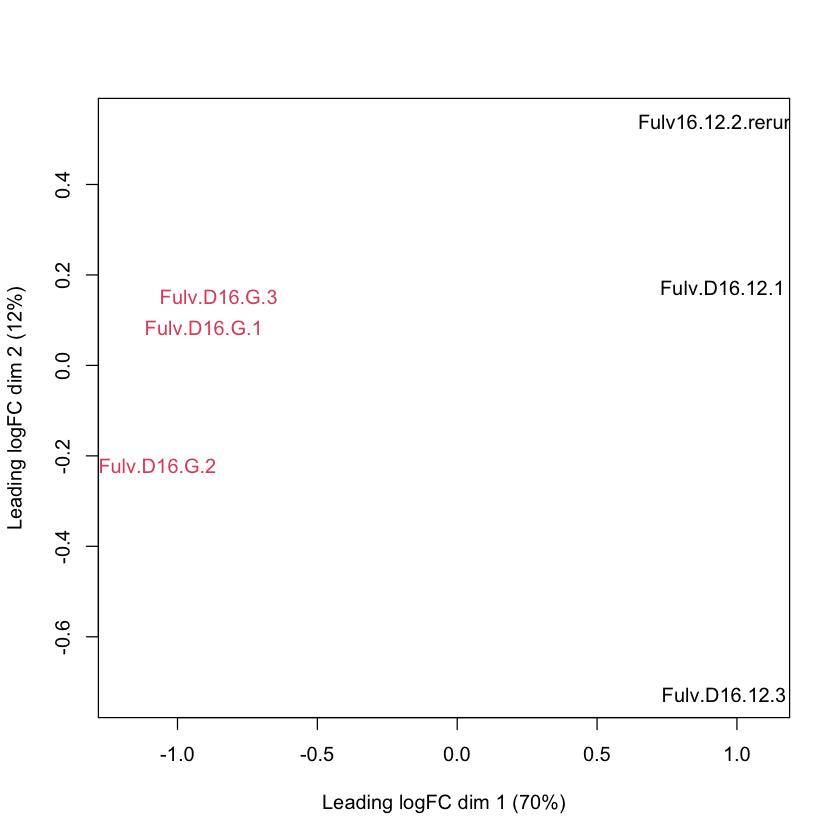

In [5]:
#denoted tb, group treatment and background. fulv.Control or palbo.KO
group_treatment_background=interaction(sample_description$Treatment,sample_description$Background)
print(group_treatment_background)

plotMDS(d, col = as.numeric(group_treatment_background))



#denoted tdb, group treatment and days and background. fulv.0.control or palbo.16.KO
group_treatment_days_background = interaction(sample_description$Treatment,sample_description$Days,sample_description$Background)
print(group_treatment_days_background)

plotMDS(d, col = as.numeric(group_treatment_days_background))

#denoted tdg, group treatment and days and guide. fulv.0.12 or palbo.16.G
group_treatment_days_guide = interaction(sample_description$Treatment,sample_description$Days,sample_description$KO_Guide)
print(group_treatment_days_guide)

plotMDS(d, col = as.numeric(group_treatment_days_guide))





,grouping_tdbFulvestrant.16.Control,grouping_tdbFulvestrant.16.KO
ENSG00000227232.5,2.012382,1.193774
ENSG00000279457.4,2.487099,1.772395
ENSG00000225972.1,4.956772,3.728038
ENSG00000225630.1,5.777424,4.901378
ENSG00000237973.1,8.622347,7.587004
ENSG00000229344.1,6.861301,5.924547
,grouping_tdbFulvestrant.16.Control,grouping_tdbFulvestrant.16.KO
ENSG00000227232.5,0.11473076,0.15212593
ENSG00000279457.4,0.09965558,0.12677250
ENSG00000225972.1,0.05311159,0.07354317


[1] "grouping_tdbFulvestrant.16.Control" "grouping_tdbFulvestrant.16.KO"     


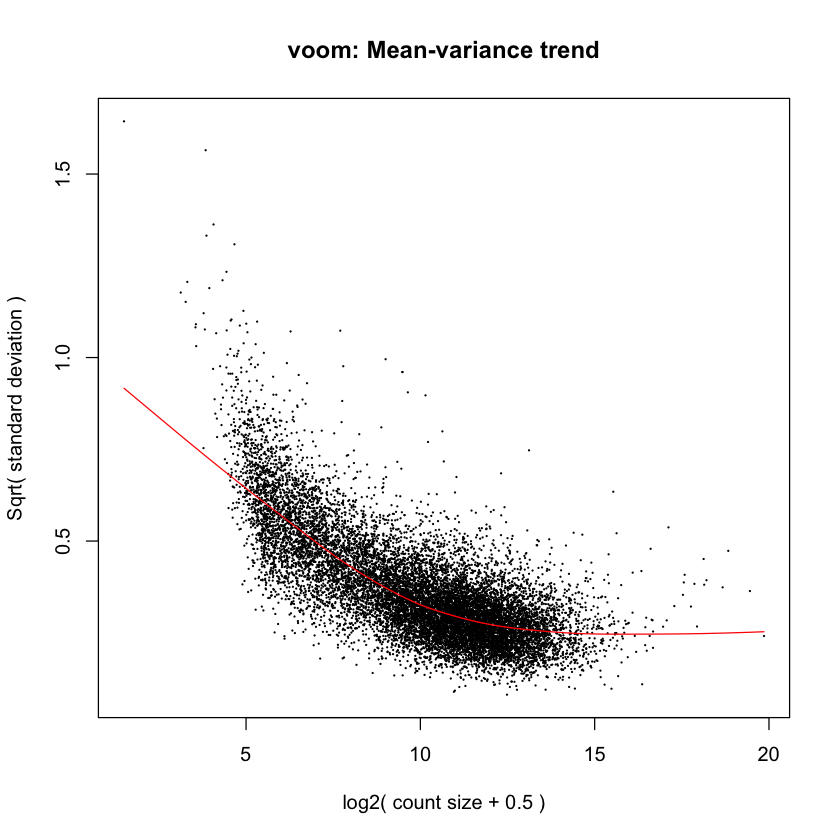

In [6]:
grouping_tdb = group_treatment_days_background


mm_tdb = model.matrix(~0 + grouping_tdb)
y_tdb = voom(d, mm_tdb, plot = T)

fit_tdb = lmFit(y_tdb,mm_tdb)
head(fit_tdb)

print(colnames(coef(fit_tdb)))
contrast_group_ko_c= makeContrasts(grouping_tdbFulvestrant.16.KO - grouping_tdbFulvestrant.16.Control, levels = colnames(coef(fit_tdb)))




In [7]:
#contrast
contrastFunction = function(fit_object, contrast_object){
  tmp = contrasts.fit(fit_object, contrast_object)
  tmp = eBayes(tmp)
  top.table = topTable(tmp, sort.by = 'logFC', n = Inf)
  head(top.table, 50)
  qqunif.plot(top.table$P.Val)
  hist(top.table$P.Val)
  print(paste0('number gene adj.p.val <.05 = ', length(which(top.table$adj.P.Val <.05))))

  df = as.data.frame(top.table)
  
  #replace add genename to esng
  gene_name_df <- read.csv('name_description.csv', sep = ',')

  df$gene_name = gene_name_df$Description[match(row.names(df), gene_name_df$Name)]
  return(df)
}



#qqplot
qqunif.plot<-function(pvalues, 
	should.thin=T, thin.obs.places=2, thin.exp.places=2, 
	xlab=expression(paste("Expected (",-log[10], " p-value)")),
	ylab=expression(paste("Observed (",-log[10], " p-value)")), 
	draw.conf=TRUE, conf.points=1000, conf.col="lightgray", conf.alpha=.05,
	already.transformed=FALSE, pch=20, aspect="iso", prepanel=prepanel.qqunif,
	par.settings=list(superpose.symbol=list(pch=pch)), ...) {
	
	
	#error checking
	if (length(pvalues)==0) stop("pvalue vector is empty, can't draw plot")
	if(!(class(pvalues)=="numeric" || 
		(class(pvalues)=="list" && all(sapply(pvalues, class)=="numeric"))))
		stop("pvalue vector is not numeric, can't draw plot")
	if (any(is.na(unlist(pvalues)))) stop("pvalue vector contains NA values, can't draw plot")
	if (already.transformed==FALSE) {
		if (any(unlist(pvalues)==0)) stop("pvalue vector contains zeros, can't draw plot")
	} else {
		if (any(unlist(pvalues)<0)) stop("-log10 pvalue vector contains negative values, can't draw plot")
	}
	
	
	grp<-NULL
	n<-1
	exp.x<-c()
	if(is.list(pvalues)) {
		nn<-sapply(pvalues, length)
		rs<-cumsum(nn)
		re<-rs-nn+1
		n<-min(nn)
		if (!is.null(names(pvalues))) {
			grp=factor(rep(names(pvalues), nn), levels=names(pvalues))
			names(pvalues)<-NULL
		} else {
			grp=factor(rep(1:length(pvalues), nn))
		}
		pvo<-pvalues
		pvalues<-numeric(sum(nn))
		exp.x<-numeric(sum(nn))
		for(i in 1:length(pvo)) {
			if (!already.transformed) {
				pvalues[rs[i]:re[i]] <- -log10(pvo[[i]])
				exp.x[rs[i]:re[i]] <- -log10((rank(pvo[[i]], ties.method="first")-.5)/nn[i])
			} else {
				pvalues[rs[i]:re[i]] <- pvo[[i]]
				exp.x[rs[i]:re[i]] <- -log10((nn[i]+1-rank(pvo[[i]], ties.method="first")-.5)/(nn[i]+1))
			}
		}
	} else {
		n <- length(pvalues)+1
		if (!already.transformed) {
			exp.x <- -log10((rank(pvalues, ties.method="first")-.5)/n)
			pvalues <- -log10(pvalues)
		} else {
			exp.x <- -log10((n-rank(pvalues, ties.method="first")-.5)/n)
		}
	}


	#this is a helper function to draw the confidence interval
	panel.qqconf<-function(n, conf.points=1000, conf.col="gray", conf.alpha=.05, ...) {
		require(grid)
		conf.points = min(conf.points, n-1);
		mpts<-matrix(nrow=conf.points*2, ncol=2)
        	for(i in seq(from=1, to=conf.points)) {
            		mpts[i,1]<- -log10((i-.5)/n)
            		mpts[i,2]<- -log10(qbeta(1-conf.alpha/2, i, n-i))
            		mpts[conf.points*2+1-i,1]<- -log10((i-.5)/n)
            		mpts[conf.points*2+1-i,2]<- -log10(qbeta(conf.alpha/2, i, n-i))
        	}
        	grid.polygon(x=mpts[,1],y=mpts[,2], gp=gpar(fill=conf.col, lty=0), default.units="native")
    	}

	#reduce number of points to plot
	if (should.thin==T) {
		if (!is.null(grp)) {
			thin <- unique(data.frame(pvalues = round(pvalues, thin.obs.places),
				exp.x = round(exp.x, thin.exp.places),
				grp=grp))
			grp = thin$grp
		} else {
			thin <- unique(data.frame(pvalues = round(pvalues, thin.obs.places),
				exp.x = round(exp.x, thin.exp.places)))
		}
		pvalues <- thin$pvalues
		exp.x <- thin$exp.x
	}
	gc()
	
	prepanel.qqunif= function(x,y,...) {
		A = list()
		A$xlim = range(x)*1.02
		A$xlim[1]=0
		A$ylim = range(y)*1.02
		A$ylim[1] = 0
		return(A)
	}

	#draw the plot
	xyplot(pvalues~exp.x, groups=grp, xlab=xlab, ylab=ylab, aspect=aspect,
		prepanel=prepanel, scales=list(axs="i"), pch=pch,
		panel = function(x, y, ...) {
			if (draw.conf) {
				panel.qqconf(n, conf.points=conf.points, 
					conf.col=conf.col, conf.alpha=conf.alpha)
			};
			panel.xyplot(x,y, ...);
			panel.abline(0,1);
		}, par.settings=par.settings, ...
	)
}


In [8]:
#volcano plot
plotVolcano = function(df, select_lab, title= NULL,keyvals= NULL){
  EnhancedVolcano(df, lab = df$gene_name, selectLab = select_lab, x = 'logFC', y = 'adj.P.Val',xlim = c(min(df[['logFC']], na.rm = TRUE) - .5, max(df[['logFC']], na.rm = TRUE) +
    .5),
  ylim = c(0, max(-log10(df[['adj.P.Val']]), na.rm = TRUE) + .5),FCcutoff = .001,pCutoff = 1, cutoffLineType = 'blank' ,legendPosition = 'right',drawConnectors =TRUE,widthConnectors = 0.3, pointSize = 1.5, labSize = 3.0, maxoverlapsConnectors = 50, title = title,colCustom = keyvals )
}


gsea_res = function(ranked_df_object, pathway_object){
  set.seed(42)
  fgseaRes = fgsea(pathways = pathway_object, stats = ranked_df_object, minSize = 15, maxSize = 500, eps = 0)
  topPathwaysUp = fgseaRes[ES > 0][head(order(pval), n=Inf),]
  topPathwaysDown = fgseaRes[ES < 0][head(order(pval), n=Inf),]
  topPathwaysUp_pathways = fgseaRes[ES > 0][head(order(pval), n=10),pathway]
  topPathwaysDown_pathways = fgseaRes[ES < 0][head(order(pval), n=10),pathway]
  topPathwaysAll = c(topPathwaysUp_pathways, rev(topPathwaysDown_pathways))
  
  new_list = list(topPathwaysUp, topPathwaysDown, topPathwaysAll, fgseaRes)
  return(new_list)
    
}

[1] "number gene adj.p.val <.05 = 7021"


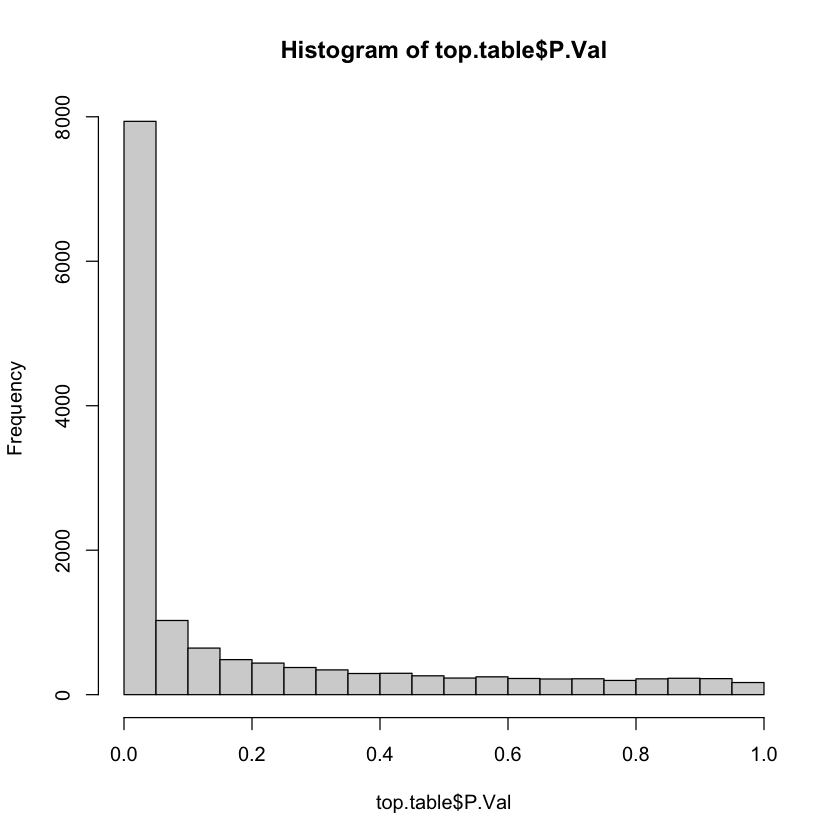

In [9]:
df_tdb_ko_c = contrastFunction(fit_tdb, contrast_group_ko_c)

Warning message:
“ggrepel: 14217 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


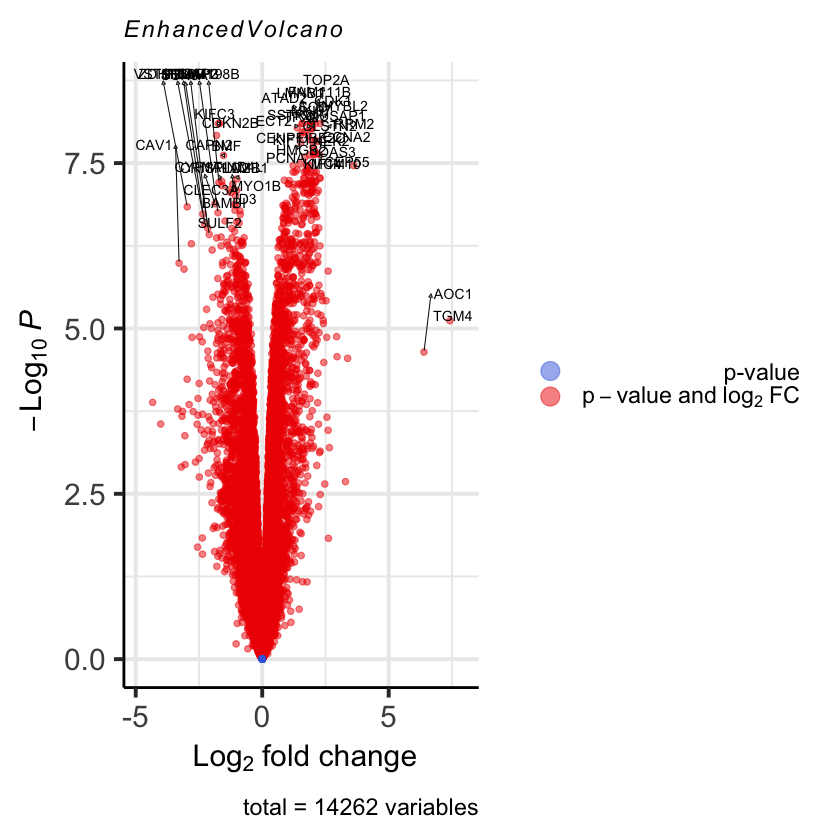

In [10]:
#remove duplicate gene values (most genes have similar logFC. remove lower logFC. for gene CYB561D2, logFC is .2 and -.0711, for RGS5, logFC is -.1461 and .004213093)
#duplicates= df_tdb_ko_c[duplicated(df_tdb_ko_c$gene_name),]
df_tdb_ko_c = df_tdb_ko_c[!duplicated(df_tdb_ko_c$gene_name),]

#save as csv
write.csv(df_tdb_ko_c, 'df_tdb_ko_c_fulv.csv')

plotVolcano(df = df_tdb_ko_c, select_lab = df_tdb_ko_c$gene_name)



In [11]:
#t statistic for gsea
ranked_df = df_tdb_ko_c
ranked_df = within(ranked_df, rank <- ranked_df$t)
ranked_df = ranked_df[,c('gene_name', 'rank')]
ranked_df = ranked_df %>% arrange(rank)
ranked_df = deframe(ranked_df)




#plotGseaTable(h.all_pathway[topPathways_h_all_df], ranked_df, fgseaRes_h_all_df, gseaParam= 1, colwidths = c(17, 3, 2, 2, 2.5))



In [12]:
# hallmark gene set
h.all_pathway <- gmtPathways('/Users/lmartin/Documents/2019/RNA_analysis/pathway_analysis/h.all.v6.2.symbols.gmt')
results_list = gsea_res(ranked_df, pathway_object = h.all_pathway)
h.all_pathwayUp = results_list[1]
h.all_pathwayDown = results_list[2]
h.all_pathwayAll = results_list[3]
h.all_pathway_fgseaRes = results_list[4]
print(h.all_pathwayUp)
print(h.all_pathwayDown)
#plotGseaTable(h.all_pathway[h.all_pathwayAll, ranked_df, h.all_pathway_fgseaRes, gseaParam= 1, colwidths = c(17, 3, 2, 2, 2.5))

[[1]]
                                     pathway         pval         padj
 1:                     HALLMARK_E2F_TARGETS 6.497201e-75 3.183628e-73
 2:                  HALLMARK_G2M_CHECKPOINT 1.136998e-58 2.785646e-57
 3:                  HALLMARK_MYC_TARGETS_V1 3.877593e-40 6.333402e-39
 4:                HALLMARK_MTORC1_SIGNALING 1.387707e-18 1.699941e-17
 5:       HALLMARK_OXIDATIVE_PHOSPHORYLATION 2.210633e-15 2.166420e-14
 6:                 HALLMARK_MITOTIC_SPINDLE 1.827955e-13 1.492830e-12
 7:                 HALLMARK_SPERMATOGENESIS 2.198492e-09 1.538944e-08
 8:          HALLMARK_ESTROGEN_RESPONSE_LATE 6.116538e-09 3.746380e-08
 9:                      HALLMARK_DNA_REPAIR 1.533142e-07 7.512397e-07
10:                  HALLMARK_MYC_TARGETS_V2 2.014524e-06 8.973788e-06
11:       HALLMARK_INTERFERON_GAMMA_RESPONSE 1.452640e-05 5.931612e-05
12:                      HALLMARK_GLYCOLYSIS 2.546188e-05 8.911657e-05
13:         HALLMARK_CHOLESTEROL_HOMEOSTASIS 4.067015e-05 1.328558e-04


In [25]:
fgsea <- fgsea(pathway=h.all_pathway, stats=ranked_df, minSize=10)

Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-50. You can set the `eps` argument to zero for better estimation.”


In [26]:


fwrite(fgsea, "~/Documents/2023/Experimental_RNA_seq/experimental_kmt2c_fgseaRes_hallmark_fulv.csv")

In [17]:
#c2 curated gene sets
c2.all_pathway  <- gmtPathways("/Users/lmartin/Documents/2019/RNA_analysis/pathway_analysis/c2.all.v7.1.symbols.gmt")
results_list = gsea_res(ranked_df, pathway_object = c2.all_pathway)
c2.all_pathwayUp = results_list[1]
c2.all_pathwayDown = results_list[2]
c2.all_pathwayAll = results_list[3]
c2.all_pathway_fgseaRes = results_list[4]
print(c2.all_pathwayUp)
print(c2.all_pathwayDown)

[[1]]
                                                                              pathway
   1:                                             DUTERTRE_ESTRADIOL_RESPONSE_24HR_UP
   2:                                                KOBAYASHI_EGFR_SIGNALING_24HR_DN
   3:                                            SHEDDEN_LUNG_CANCER_POOR_SURVIVAL_A6
   4:                                     ROSTY_CERVICAL_CANCER_PROLIFERATION_CLUSTER
   5:                                           FLORIO_NEOCORTEX_BASAL_RADIAL_GLIA_DN
  ---                                                                                
2618:                                                        REACTOME_MTOR_SIGNALLING
2619:                                              KEGG_INOSITOL_PHOSPHATE_METABOLISM
2620: REACTOME_TP53_REGULATES_TRANSCRIPTION_OF_GENES_INVOLVED_IN_CYTOCHROME_C_RELEASE
2621:                                  GINESTIER_BREAST_CANCER_20Q13_AMPLIFICATION_UP
2622:                        REACTOME_RETROGRADE

In [27]:
fgsea <- fgsea(pathway=c2.all_pathway, stats=ranked_df, minSize=10)

Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-50. You can set the `eps` argument to zero for better estimation.”


In [28]:
fwrite(fgsea, "~/Documents/2023/Experimental_RNA_seq/experimental_kmt2c_fgseaRes_c2_fulv.csv")

In [ ]:
#c3 regulatory target transcription factor targets
c3.tft_pathway = gmtPathways('c3.tft.v7.4.symbols.gmt.txt')
results_list = gsea_res(ranked_df, pathway_object = c3.tft_pathway)
c3.tft_pathwayUp = results_list[1]
c3.tft_pathwayDown = results_list[2]
c3.tft_pathwayAll = results_list[3]
c3.tft_pathway_fgseaRes = results_list[4]
print(c3.tft_pathwayUp)
print(c3.tft_pathwayDown)

In [ ]:
#c5 gene ontology molecular function
c5.go.mf_pathway = gmtPathways('c5.go.mf.v7.4.symbols.gmt.txt')
results_list = gsea_res(ranked_df, pathway_object = c5.go.mf_pathway)
c5.go.mf_pathwayUp = results_list[1]
c5.go.mf_pathwayDown = results_list[2]
c5.go.mf_pathwayAll = results_list[3]
c5.go.mf_pathway_fgseaRes = results_list[4]
print(c5.go.mf_pathwayUp)
print(c5.go.mf_pathwayDown)

In [ ]:
#c6 ongogenic signature genesets
c6.all_pathway = gmtPathways('c6.all.v7.4.symbols.gmt.txt')
results_list = gsea_res(ranked_df, pathway_object = c6.all_pathway)
c6.all_pathwayUp = results_list[1]
c6.all_pathwayDown = results_list[2]
c6.all_pathwayAll = results_list[3]
c6.all_pathway_fgseaRes = results_list[4]
print(c6.all_pathwayUp)
print(c6.all_pathwayDown)

Warning message:
“ggrepel: 18 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


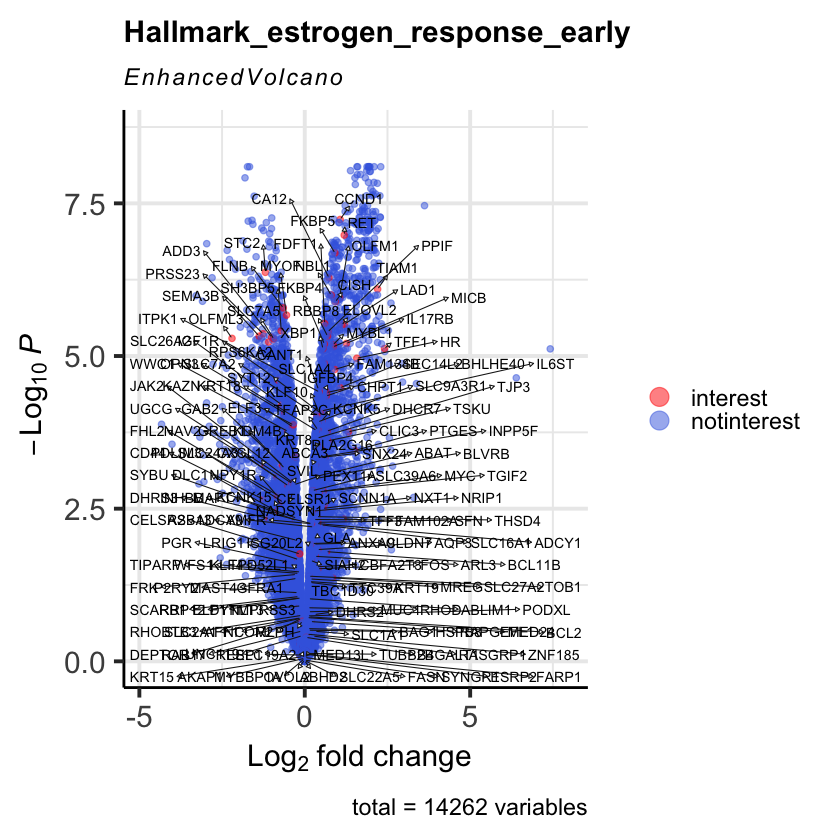

In [18]:
#highlight specific genes in volcano plot
#gene_df<- read.csv("geneset_reg_esr1.txt")
df = df_tdb_ko_c
gene_df = h.all_pathway
df_gene_interest = df[(df$gene_name %in% gene_df$HALLMARK_ESTROGEN_RESPONSE_EARLY),]

#make new column with only labels for values in gene_list. use if gene_lsit is list
df$gene_label_interest = df_gene_interest$gene_name[match(df$gene_name, df_gene_interest$gene_name)]

keyvals = ifelse(is.na(df$gene_label_interest), 'royalblue','red')



names(keyvals)[keyvals == 'red'] <- 'interest'
names(keyvals)[keyvals == 'royalblue'] <- 'notinterest'
  
pointsize = c(ifelse(is.na(df$gene_label_interest),.5, 3))
plotVolcano(df = df, select_lab = df$gene_label_interest, title = 'Hallmark_estrogen_response_early',keyvals = keyvals)


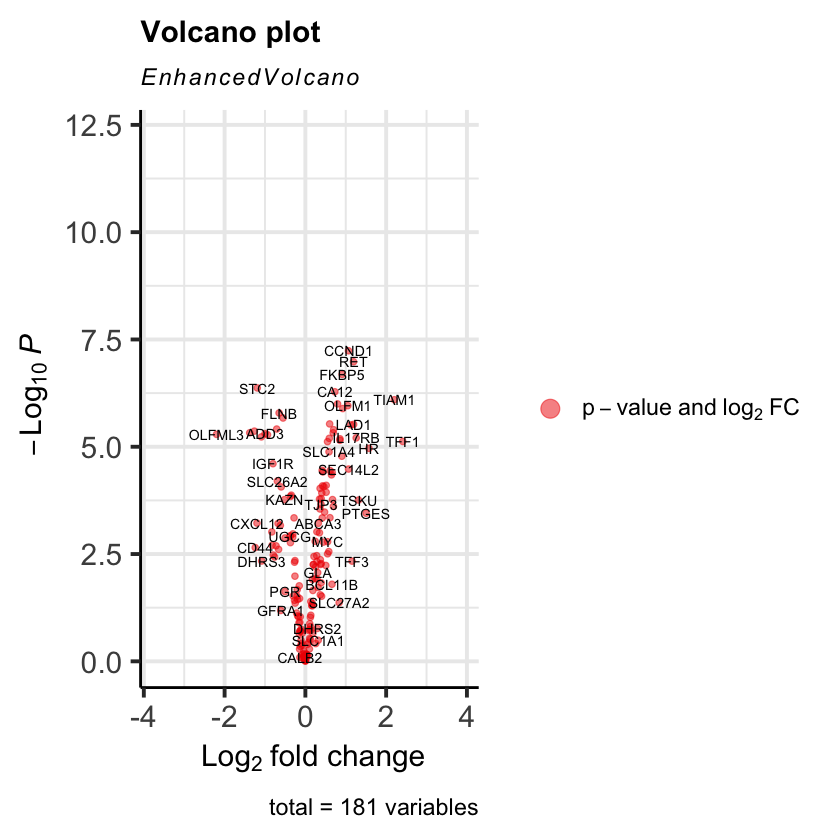

In [19]:


EnhancedVolcano(df_gene_interest, lab = df_gene_interest$gene_name, x = 'logFC', y = 'adj.P.Val',FCcutoff = .001,pCutoff = 1, cutoffLineType = 'blank' ,legendPosition = 'right',drawConnectors =FALSE,widthConnectors = 0.3, pointSize = 1.5, labSize = 3.0, maxoverlapsConnectors = 50)

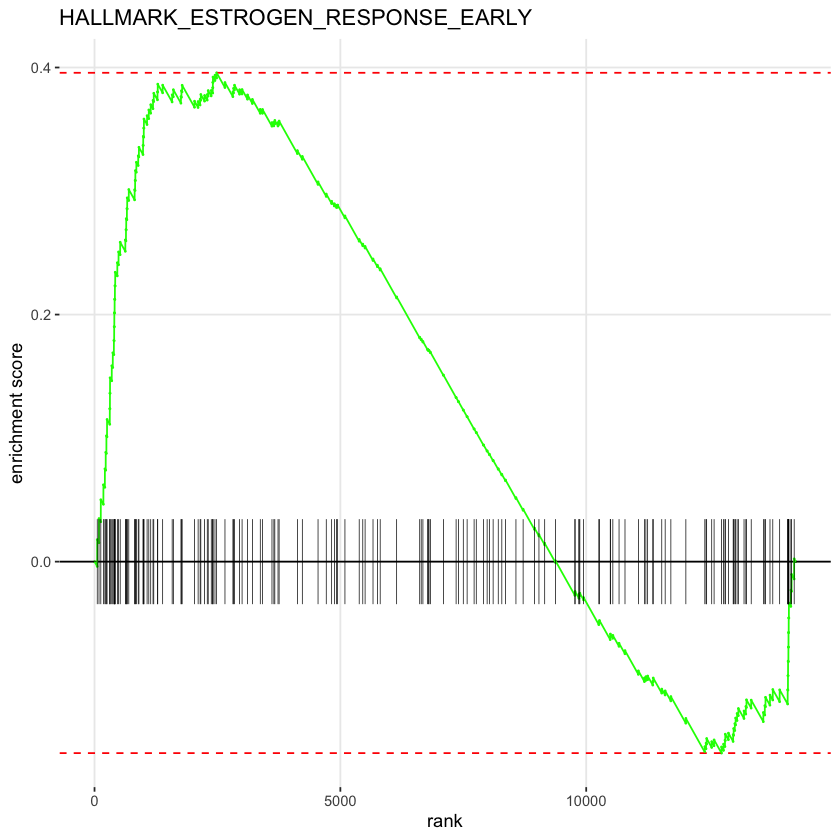

In [20]:
plotEnrichment(h.all_pathway[['HALLMARK_ESTROGEN_RESPONSE_EARLY']],ranked_df) + labs(title = 'HALLMARK_ESTROGEN_RESPONSE_EARLY')

In [13]:
enrichmentplot = function(gsea_pathway, specific_pathway, ranked_dataframe = ranked_df){
  plotEnrichment(gsea_pathway[[specific_pathway]], ranked_dataframe) + labs(title = specific_pathway)
}


In [16]:
pdf(file='UnderTx_G2M_Targ_LeadingEdge.pdf')
plotEnrichment(h.all_pathway[['HALLMARK_G2M_CHECKPOINT']],ranked_df) + labs(title = 'HALLMARK_G2M_CHECKPOINT')
dev.off()

pdf 
  2

In [ ]:
# interest_pathway = h.all_pathwayDown[[1]]$pathway[1]
# enrichmentplot(gsea_pathway = h.all_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df)

[1] "HALLMARK_E2F_TARGETS"
[1] "HALLMARK_G2M_CHECKPOINT"


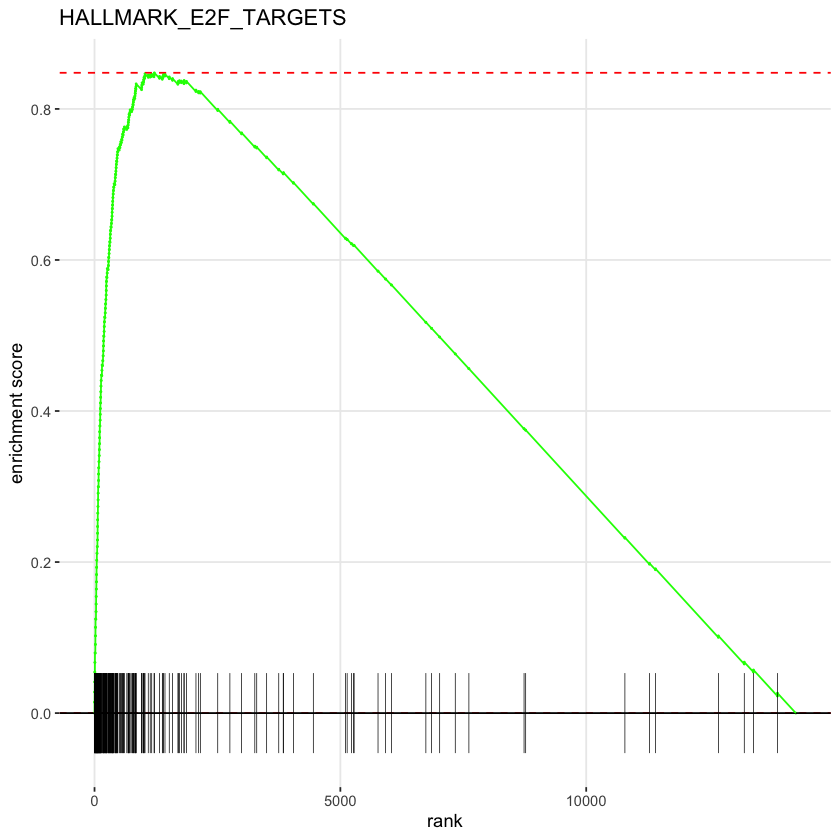

[1] "HALLMARK_MYC_TARGETS_V1"


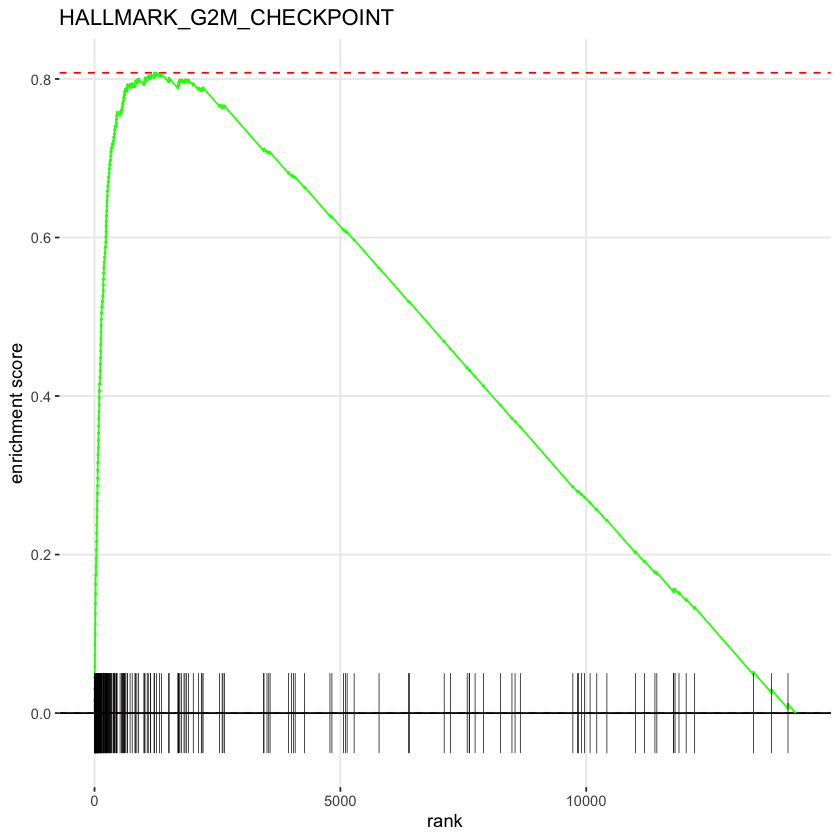

[1] "HALLMARK_MTORC1_SIGNALING"


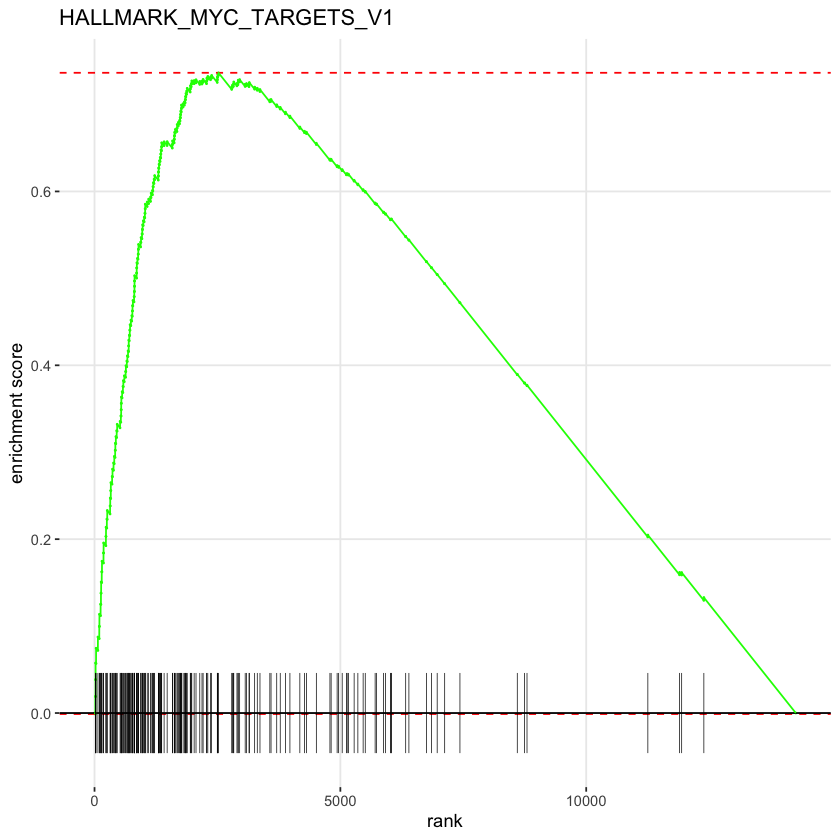

[1] "HALLMARK_OXIDATIVE_PHOSPHORYLATION"


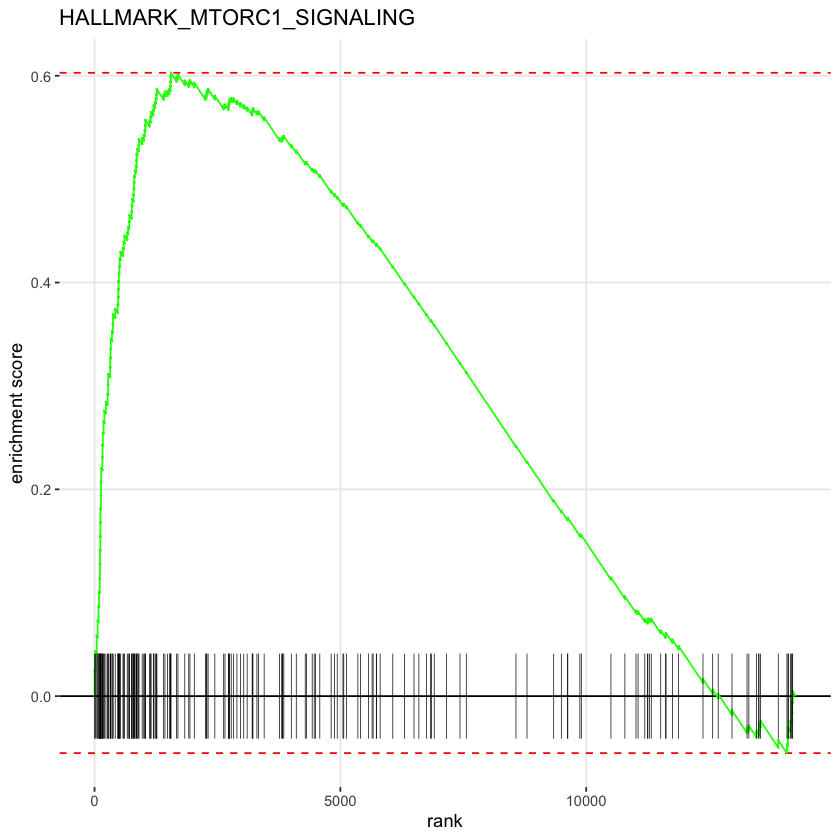

[1] "HALLMARK_MITOTIC_SPINDLE"


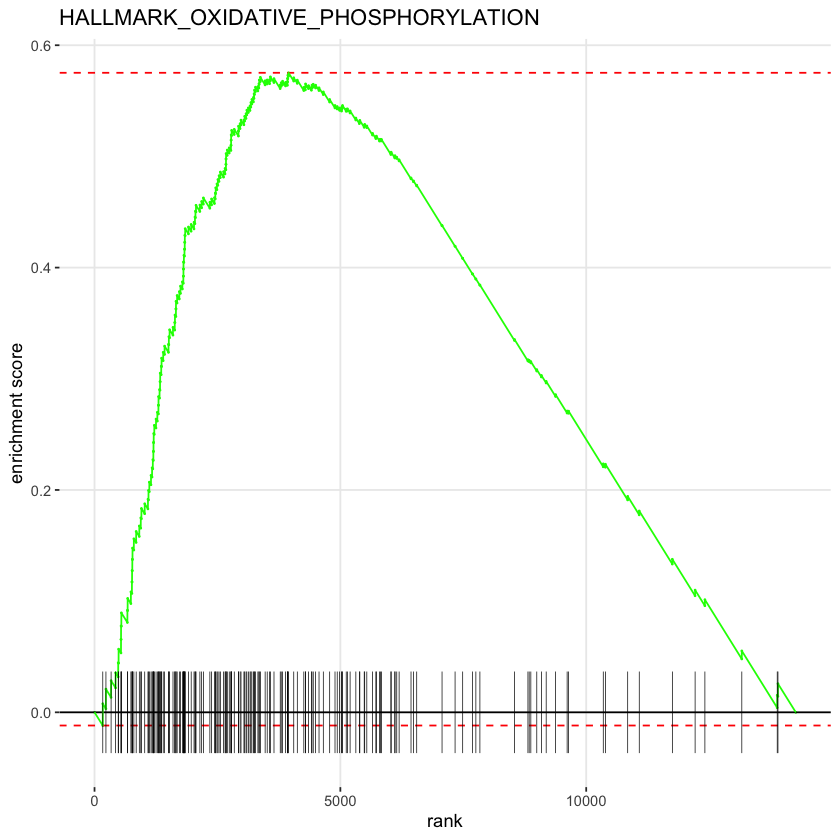

[1] "HALLMARK_SPERMATOGENESIS"


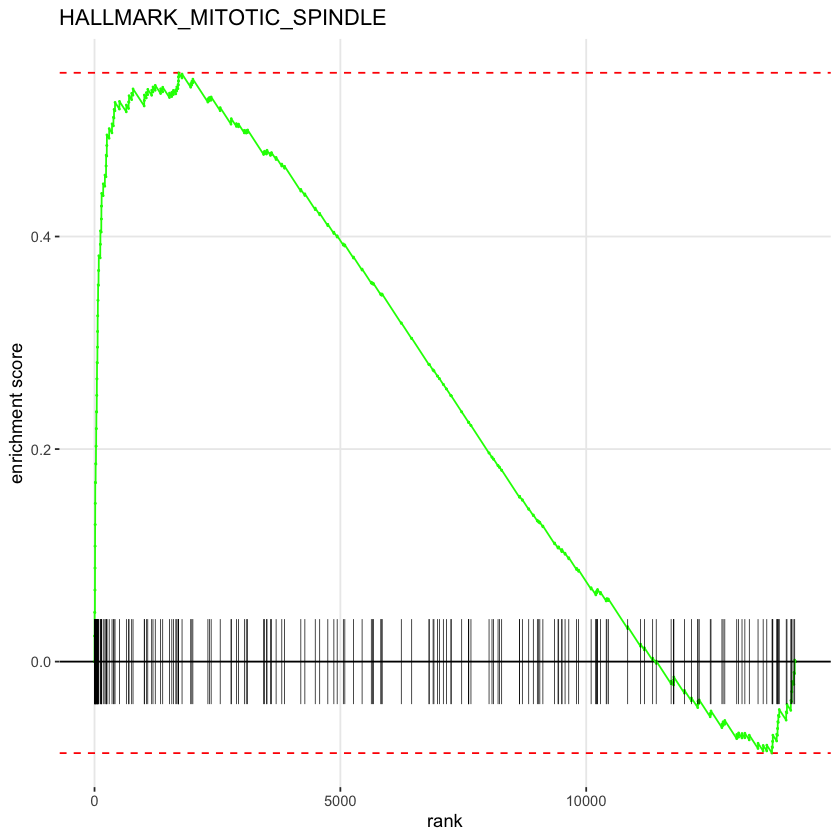

[1] "HALLMARK_ESTROGEN_RESPONSE_LATE"


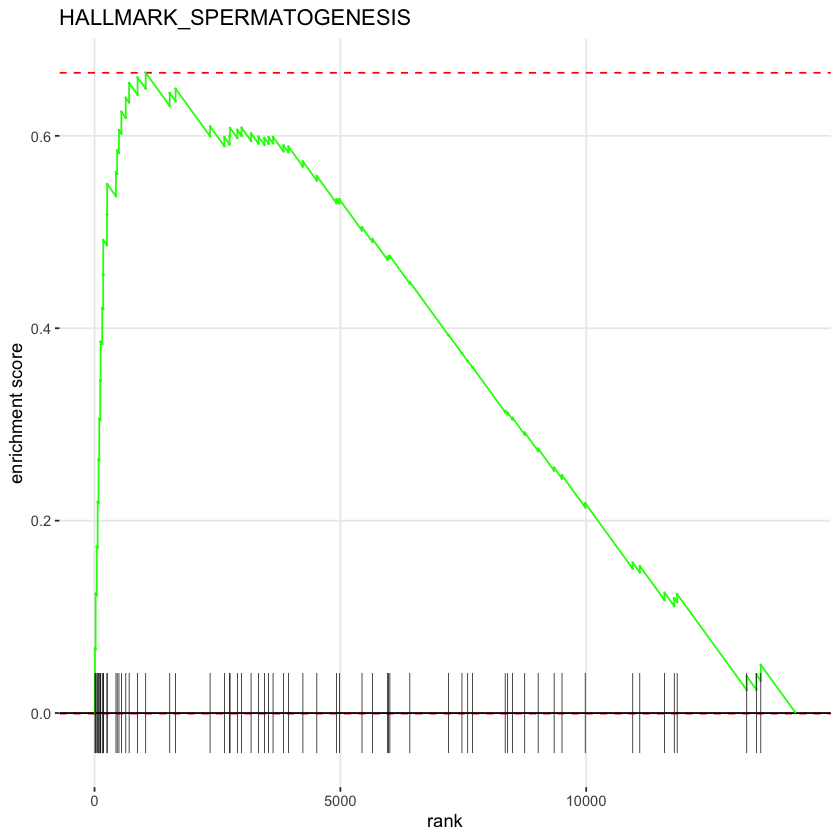

[1] "HALLMARK_DNA_REPAIR"


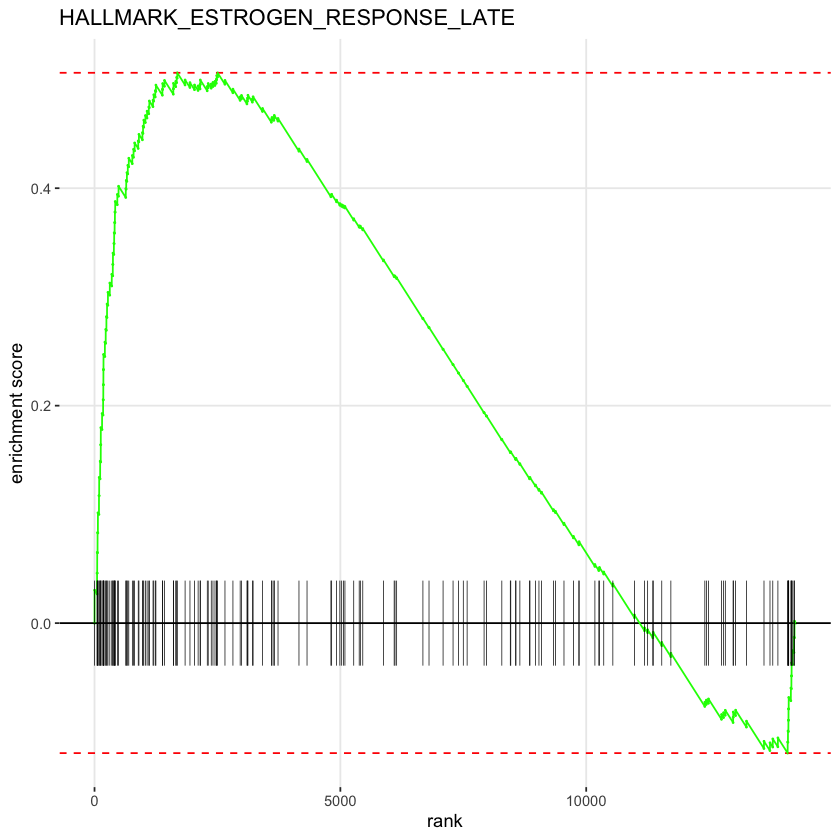

[1] "HALLMARK_MYC_TARGETS_V2"


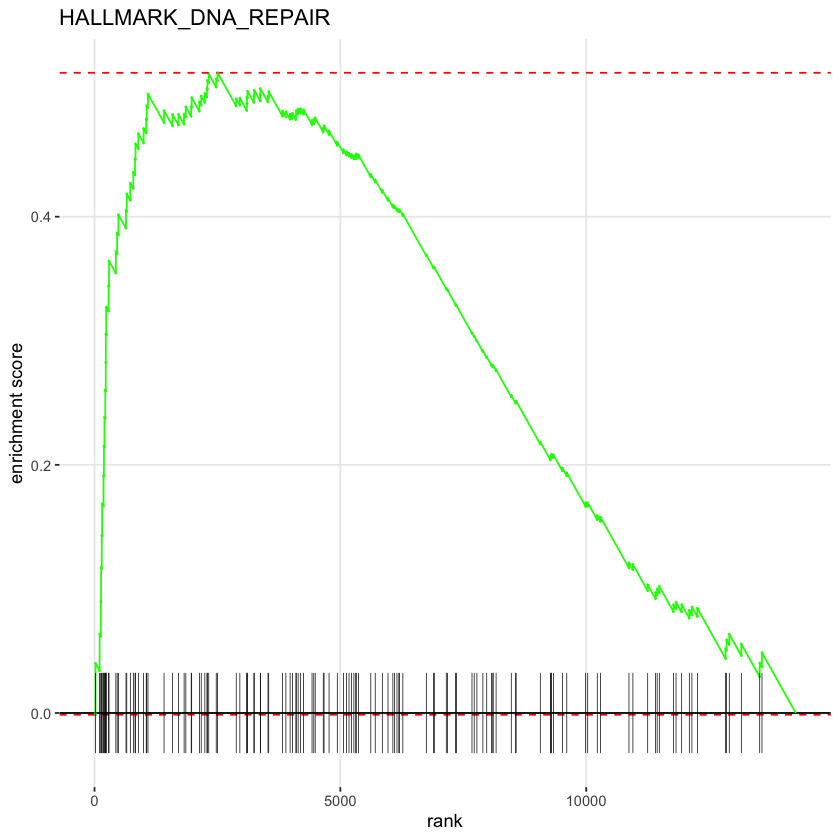

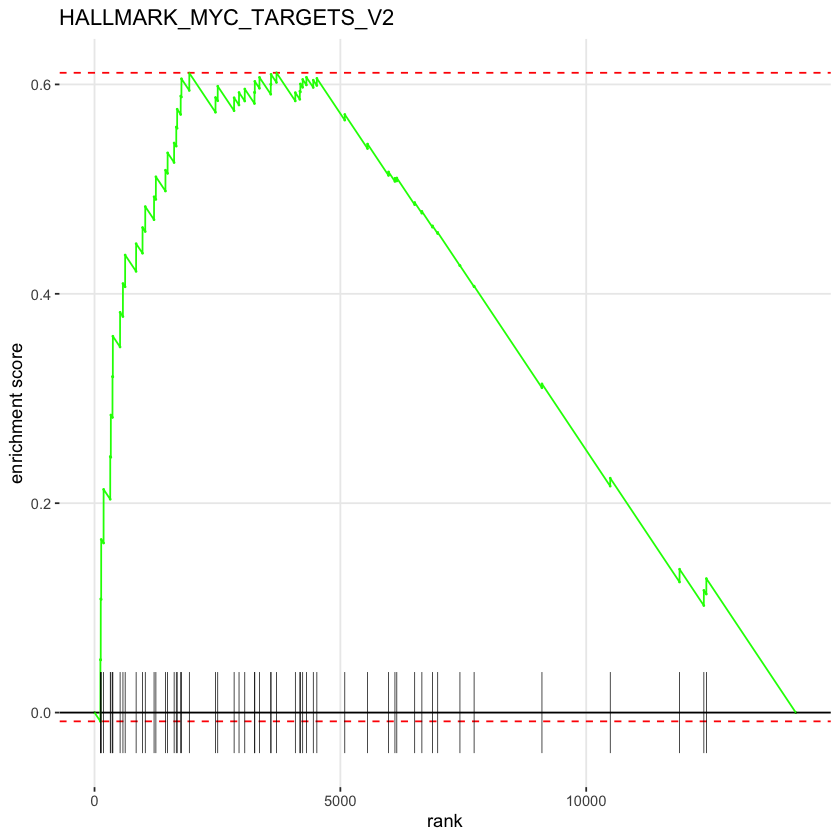

In [22]:
for (i in 1:10){

  interest_pathway = h.all_pathwayUp[[1]]$pathway[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = h.all_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

[1] "HALLMARK_UV_RESPONSE_DN"
[1] "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"


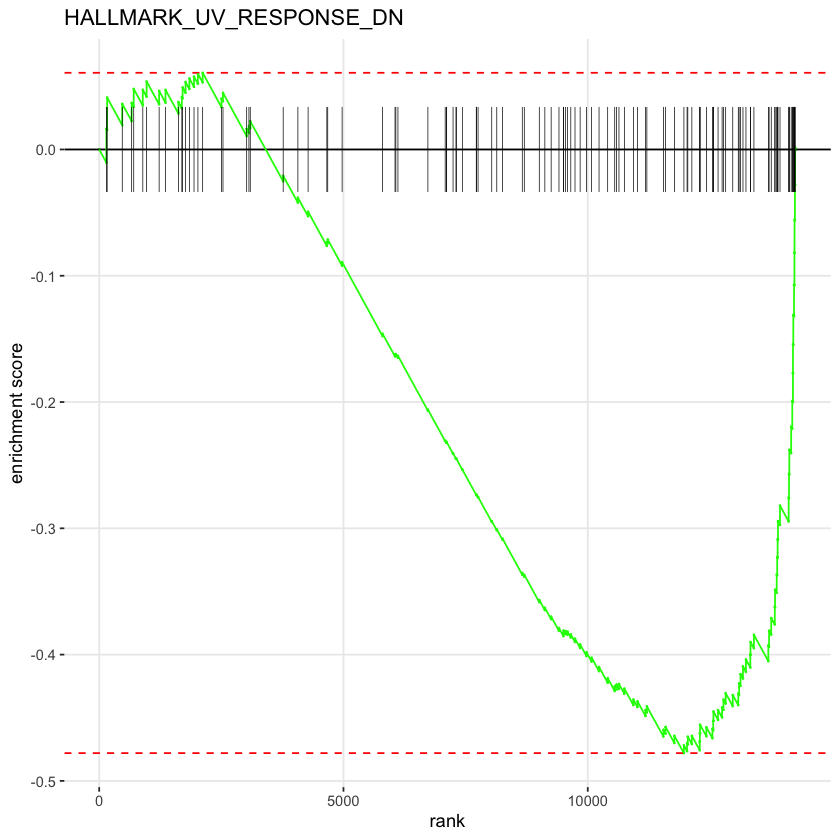

[1] "HALLMARK_MYOGENESIS"


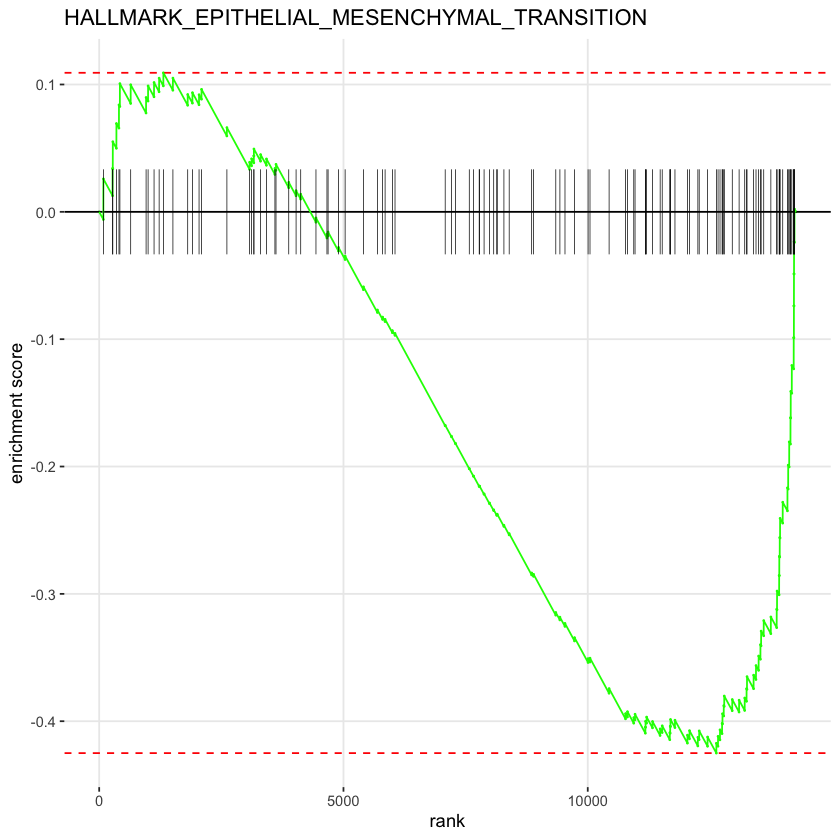

[1] "HALLMARK_COAGULATION"


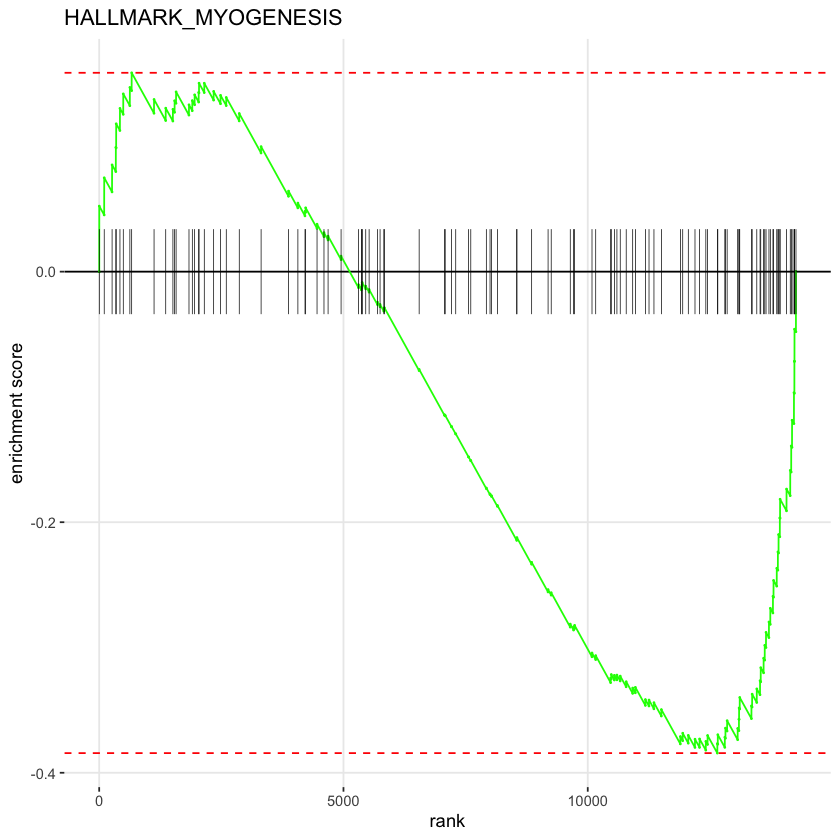

[1] "HALLMARK_HEDGEHOG_SIGNALING"


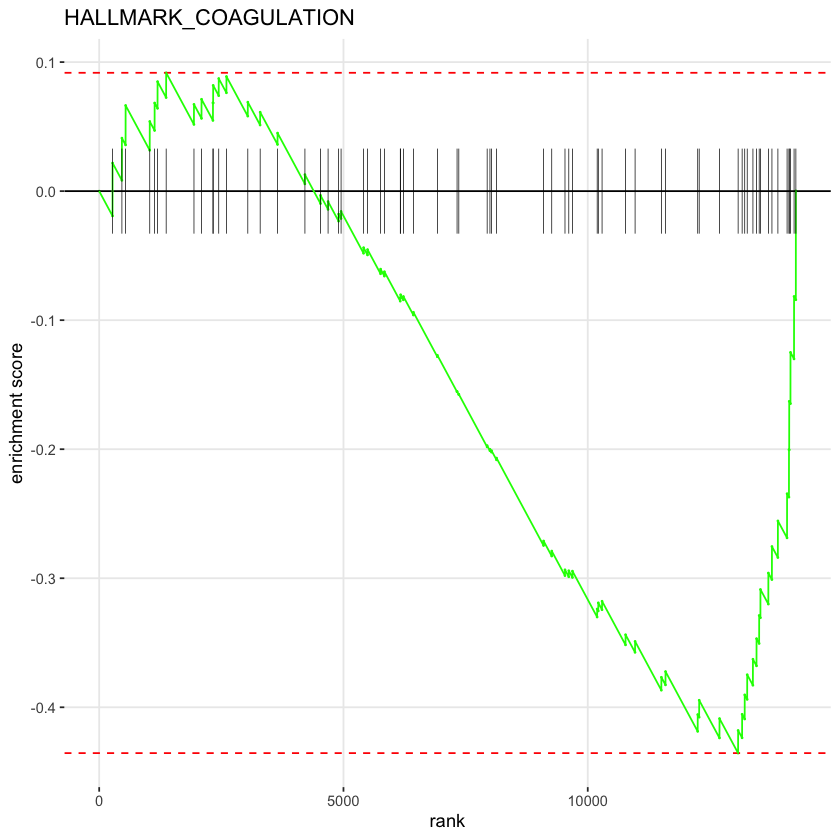

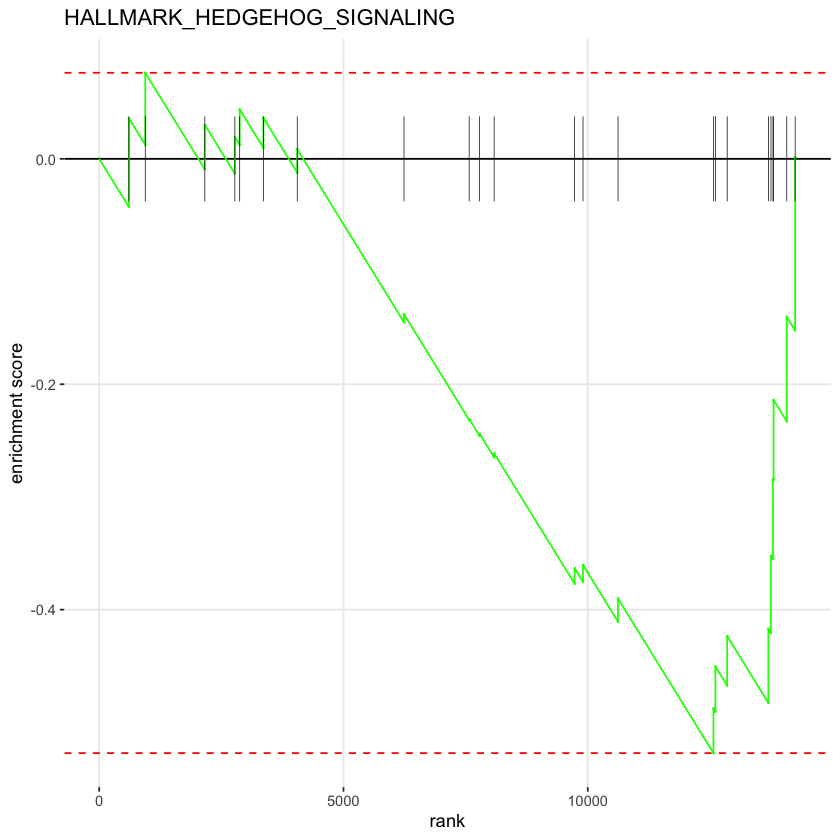

In [23]:
for (i in 1:5){

  interest_pathway = h.all_pathwayDown[[1]]$pathway[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = h.all_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

In [ ]:
c2_up_down_interest = read.csv('c2_up_down_pathways.csv')


c2_interest_list_Up = c2_up_down_interest$c2.up

for (i in 1:length(c2_interest_list_Up)){

  interest_pathway = c2_interest_list_Up[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = c2.all_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

In [ ]:
c2_interest_list_Down = c2_up_down_interest$c2.down

for (i in 1:length(c2_interest_list_Down)){

  interest_pathway = c2_interest_list_Down[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = c2.all_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

In [ ]:
for (i in 1:20){

  interest_pathway = c3.tft_pathwayUp[[1]]$pathway[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = c3.tft_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

In [ ]:
for (i in 1:20){

  interest_pathway = c3.tft_pathwayDown[[1]]$pathway[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = c3.tft_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

In [ ]:
for (i in 1:20){

  interest_pathway = c5.go.mf_pathwayUp[[1]]$pathway[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = c5.go.mf_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

In [ ]:
for (i in 1:20){

  interest_pathway = c5.go.mf_pathwayDown[[1]]$pathway[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = c5.go.mf_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

In [ ]:
for (i in 1:20){

  interest_pathway = c6.all_pathwayUp[[1]]$pathway[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = c6.all_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

In [ ]:
for (i in 1:20){

  interest_pathway = c6.all_pathwayDown[[1]]$pathway[i]
  print(interest_pathway)
  print(enrichmentplot(gsea_pathway = c6.all_pathway, specific_pathway = interest_pathway, ranked_dataframe = ranked_df))
}

In [ ]:
#write.csv(df_tdb_ko_c, 'df_tdb_ko_c.csv')
#write.csv(h.all_pathway[['HALLMARK_E2F_TARGETS']], 'h.E2Ftargets.csv')
#write.csv(h.all_pathway[['HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION']], 'h.EMT.csv')
#write.csv(c2.all_pathway[["CHARAFE_BREAST_CANCER_LUMINAL_VS_MESENCHYMAL_UP"]],"CHARAFE_BREAST_CANCER_LUMINAL_VS_MESENCHYMAL_UP.csv")